In [1]:
from LIMxCMBL.cross_spectrum import *
from LIMxCMBL.init import *
from LIMxCMBL.kernels import get_f_Kkappa, get_f_KI, get_f_KILo, apply_window

import sys
zmin = 3.5
zmax = 8.1
Lambda = 1e-3
chis_resample_len = int(np.log2(len(chis_resample)))
oup_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
oup_ILo_fname = '/scratch/users/delon/LIMxCMBL/IHiKappa/ILoKappa/zmin_%.5f_zmax_%.5f_Lambda_%.5f_chi_sample_2e%d.npy'%(zmin, zmax, Lambda,chis_resample_len)
print('outputting to', oup_fname)


chimin = ccl.comoving_angular_distance(cosmo, 1/(1+zmin))
chimax = ccl.comoving_angular_distance(cosmo, 1/(1+zmax))

f_Kkappa = get_f_Kkappa()
a_of_chibs = ccl.scale_factor_of_chi(cosmo, chibs)
z_of_chibs = 1/a_of_chibs - 1


#<I Kappa>
f_KLIM   = get_f_KI()
f_KLIM_windowed = apply_window(f_K = f_KLIM,
                               chimin = chimin,
                               chimax = chimax)


outputting to /scratch/users/delon/LIMxCMBL/IHiKappa/zmin_3.50000_zmax_8.10000_Lambda_0.00100_chi_sample_2e8.npy


In [2]:
window = np.where((chis_resample > chimin) & (chis_resample < chimax))[0]

In [3]:
2**11

2048

In [4]:
_deltas = deltas.reshape(1, 1, -1)


_chis   = np.linspace(chimin*(1+1e-8), chimax*(1 - 1e-8), 2**13)
_chis   = np.linspace(chis_resample[window][0], chis_resample[window][-1], len(window))

_chis_rs = _chis.reshape(1, -1, 1)
_minus = _chis_rs * (1 - _deltas)
_plus  = _chis_rs * (1 + _deltas)

In [5]:
_minus.shape

(1, 52, 128)

In [6]:
prefactor = 2 / _chis_rs
prefactor.shape

(1, 52, 1)

In [7]:
f_Kpsi = f_KLIM_windowed
f_Kphi = f_Kkappa

In [8]:
kernels = (f_Kpsi(_minus) * f_Kphi(_plus) + f_Kpsi(_plus) * f_Kphi(_minus))
kernels.shape

(1, 52, 128)

In [9]:
inner_integral_resampled = f_inner_integral(_chis)
inner_integral_resampled.shape

(100, 52, 128)

In [20]:
inner_dkparp_integral.shape

(100, 256, 128)

In [10]:
integrand = prefactor*kernels*inner_integral_resampled*deltas_reshaped

In [11]:
result = trapezoid(y=integrand, x=np.log(deltas), axis = -1)

In [12]:
vb = np.max(np.abs(result))

In [13]:
2**12

4096

In [14]:
np.log2(2**13 / 1652)

2.3100020285805547

/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/events.py:89: UserWarning: Casting input data from float128 to float64 for imshow.
  func(*args, **kwargs)
/share/software/user/open/py-jupyter/1.0.0_py39/lib/python3.9/site-packages/IPython/core/pylabtools.py:134: UserWarning: Casting input data from float128 to float64 for imshow.
  fig.canvas.print_figure(bytes_io, **kw)


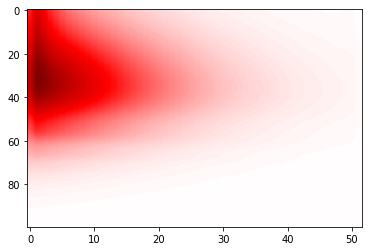

In [15]:
plt.imshow(result, aspect='auto', vmin = -vb, vmax = vb, cmap= 'seismic')

In [16]:
Ik = d_delta_integral(f_KLIM_windowed, f_Kkappa)


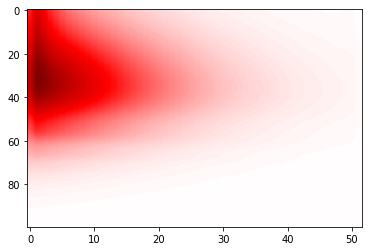

In [17]:
plt.imshow(Ik[:,window], aspect='auto', vmin = -vb, vmax = vb, cmap= 'seismic')

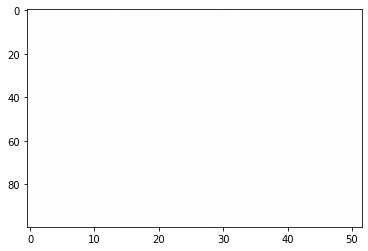

In [18]:
plt.imshow((Ik[:,window] - result) / result, aspect='auto', vmin = -1e-10, vmax = 1e-10, cmap= 'seismic')